<a href="https://colab.research.google.com/github/Justus-coded/DPhi-Deep-Learning-Bootcamp/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Download GitHub Repository
The first step is to download the repository 'Datasets' to the colab files. We can achieve this by executing the below code.

In [1]:
!git clone 'https://github.com/dphi-official/Datasets/'

Cloning into 'Datasets'...
remote: Enumerating objects: 9874, done.
remote: Total 9874 (delta 0), reused 0 (delta 0), pack-reused 9874
Receiving objects: 100% (9874/9874), 427.70 MiB | 38.06 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (9345/9345), done.


We need to extract the two zip files 'test_beg.zip' which contains testing images and 'train_beg.zip' contains images for training the model. To extract these zip files execute below code.

In [2]:
# To unzip train_beg.zip
!unzip /content/Datasets/animal_data/train_beg.zip 

# To unzip test_beg.zip
!unzip /content/Datasets/animal_data/test_beg.zip

Archive:  /content/Datasets/animal_data/train_beg.zip
   creating: train_beg/
  inflating: train_beg/Image_1.jpg   
  inflating: train_beg/Image_10.jpg  
  inflating: train_beg/Image_100.jpg  
  inflating: train_beg/Image_1000.jpg  
  inflating: train_beg/Image_1001.jpg  
  inflating: train_beg/Image_1002.jpg  
  inflating: train_beg/Image_1003.jpg  
  inflating: train_beg/Image_1004.jpg  
  inflating: train_beg/Image_1005.jpg  
  inflating: train_beg/Image_1006.jpg  
  inflating: train_beg/Image_1007.jpg  
  inflating: train_beg/Image_1008.jpg  
  inflating: train_beg/Image_1009.jpg  
  inflating: train_beg/Image_101.jpg  
  inflating: train_beg/Image_1010.jpg  
  inflating: train_beg/Image_1011.jpg  
  inflating: train_beg/Image_1012.jpg  
  inflating: train_beg/Image_1013.jpg  
  inflating: train_beg/Image_1014.jpg  
  inflating: train_beg/Image_1015.jpg  
  inflating: train_beg/Image_1016.jpg  
  inflating: train_beg/Image_1017.jpg  
  inflating: train_beg/Image_1018.jpg  
  inflat

**Now we are all set to start the working on the dataset!!!**


## Loading Libraries
Let's import the required libraries. Not importing all the libraries in one go instead we will be importing whenever we require one.

In [3]:
# import the basic libraries
import pandas as pd
import numpy as np

## Loading the Data
We are given training data in two different files/folders:

"

In [4]:
# Loading training csv file
train_labels = pd.read_csv("/content/Datasets/animal_data/Training_set_animals.csv")
train_labels.head()    # display first five rows from train_labels dataframe

,filename,animal_type
0,Image_1.jpg,mucca
1,Image_2.jpg,mucca
2,Image_3.jpg,mucca
3,Image_4.jpg,mucca
4,Image_5.jpg,mucca


We can see above the image id with their corresponding labels

Let's get all the training images paths because all we have is the image paths where the image is located. We will also need to get all the image ids (i.e. the image filename) for example, Image_1.jpg

In [5]:
image_paths = ['/content/train_beg/' + fname for fname in train_labels['filename']]
image_paths    # will get list of list of image id and image path

"""
The reason behind using the filename from train_labels is that 
- it will help you to get all the images whose labels we already have in train_labels.
- It will also help to maintain the order of the images. If you notice the images ids in train_labels, they are
in some specific order, this will help you load all the images location in the list in the same order.
"""

'\nThe reason behind using the filename from train_labels is that \n- it will help you to get all the images whose labels we already have in train_labels.\n- It will also help to maintain the order of the images. If you notice the images ids in train_labels, they are\nin some specific order, this will help you load all the images location in the list in the same order.\n'

We have all the labels for the images in 'train_labels' and all the filepaths in 'image_paths'. So let's check if the number of labels we have is same as the number of images. The below code will help you to check this.

In [6]:
# Confirm if number of filepaths (i.e. images) is same as number of labels given
if len(train_labels) == len(image_paths):
    print('Number of labels i.e. ', len(train_labels), 'matches the number of filepaths i.e. ', len(image_paths))
else:
    print('Number of labels does not match the number of filepaths')

Number of labels i.e.  1200 matches the number of filepaths i.e.  1200


They are same

In [7]:
train_data = pd.DataFrame({'filename': train_labels['filename'], 'filepath': image_paths, 'animal_type': train_labels['animal_type']})
train_data.head()

,filename,filepath,animal_type
0,Image_1.jpg,/content/train_beg/Image_1.jpg,mucca
1,Image_2.jpg,/content/train_beg/Image_2.jpg,mucca
2,Image_3.jpg,/content/train_beg/Image_3.jpg,mucca
3,Image_4.jpg,/content/train_beg/Image_4.jpg,mucca
4,Image_5.jpg,/content/train_beg/Image_5.jpg,mucca


We can notice above that the filename: 'Image_1.jpg' is present in the respective filepath: '/content/train_beg/Image_1.jpg'. This indicates all are in the same order. You can also try and check for other images randomly if filepath and filname are correct or not.

In [8]:
print(train_data.iloc[578])

filename                          Image_579.jpg
filepath       /content/train_beg/Image_579.jpg
animal_type                               mucca
Name: 578, dtype: object


### Display an Image

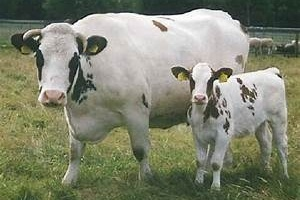

In [ ]:
# to display the image

In [ ]:
# anymal_type of above image
# write a Python script here that would return you the animal_type of above image

mucca


And it's correct

Well we are set, but there is a trick, Machine/Deep Learning models doesn't accept images, they accepts only numbers. We need to convert these images to their pixel values so that we can apply ML/DL Models. We can achieve this using cv2 (OpenCV) library. 

## Loading Image's Pixel Values
OpenCV's imread method helps in reading an image and getting its pixel values. You just need to provide the path of each image inside imread().

Finally, store the image as well as its label inside data.

In [9]:
# import cv2 library
import cv2

In [10]:
data = []    # initialize a list to store, each image's pixel values 
labels = []   # initialize a list to store each image's labels i.e. animal type
for i in range(len(train_data)):
  image_arr = cv2.imread(train_data['filepath'][i])     # for each i starting from 0, convert the ith image to array of pixels
  data.append(image_arr)
  # We also need to convert the categorical values i.e. 'mucca' and 'pecora' to numerical
  # Using conditional statement, we can do it here only. if mucca then 0, if pecora then 1
  if train_data['animal_type'][i] == 'mucca':           # if respective image's label is mucca
    labels.append(0)
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
    labels.append(1)      # This indexing needs to be remembered 'mucca' = 0 and 'pecora' = 1, this will be required when you convert your predictions on test data to categorical value again


In [11]:
# data and labels are in normal python list, you must convert it to numpy array. You can do it using a single command!
data_arr = np.array(data)
labels_arr = np.array(labels)

### Display image using pixel values
Using imshow from mtaplotlib.pyplot you can display an image using those pixel values

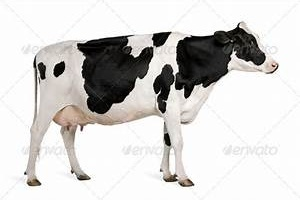

In [12]:
# For Colab users
from google.colab.patches import cv2_imshow
cv2_imshow(data_arr[9])

# waiting for key event
cv2.waitKey(0)

# destroying all windows
cv2.destroyAllWindows()

In [13]:
# respective labels
# label of the above image displayed
labels_arr[9]

0

0 means mucca, so it's correct

In [ ]:
#for img in data_arr:
 # resized_image = cv2.resize(img, (350,300))

# Colab users: 
#cv2_imshow(resized_image[82])

One can flatten images depending on the model one is using

## Split the Data

In [14]:
from sklearn.model_selection import train_test_split
# Can split data using train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_arr, labels_arr, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape

((960, 200, 300, 3), (240, 200, 300, 3))

In [ ]:
#X_test_flattened= X_test.reshape(len(X_test), 200*300*3)


In [ ]:
#X_train_flattened= X_train.reshape(len(X_train), 200*300*3)

#X_train_flattened.shape

## Data Augmentation and Building Model


In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [19]:
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)


In [28]:
#Sequential way of building models

model = tf.keras.Sequential()
model.add(data_augmentation)
model.add(Flatten(input_shape=(200,300,3)))
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 300, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 180000)            0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              184321024 
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

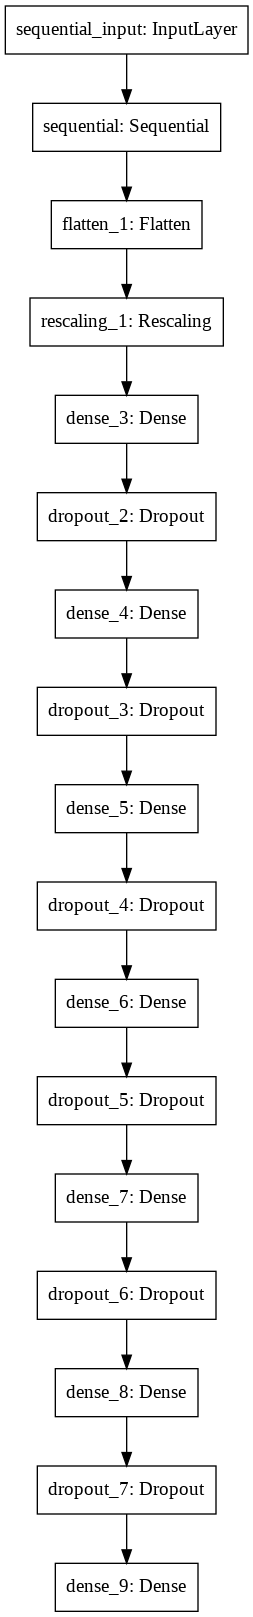

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model)

## Optimize Model

In [31]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(
            X_train, y_train,
            validation_data = (X_test, y_test),
            epochs = 50,
            verbose = 2)

Epoch 1/50
30/30 - 2s - loss: 25.1794 - accuracy: 0.5073 - val_loss: 1.4899 - val_accuracy: 0.4958
Epoch 2/50
30/30 - 2s - loss: 7.7011 - accuracy: 0.5063 - val_loss: 0.7204 - val_accuracy: 0.5833
Epoch 3/50
30/30 - 2s - loss: 2.3952 - accuracy: 0.4594 - val_loss: 0.7077 - val_accuracy: 0.5125
Epoch 4/50
30/30 - 2s - loss: 1.4743 - accuracy: 0.4875 - val_loss: 0.6992 - val_accuracy: 0.5083
Epoch 5/50
30/30 - 2s - loss: 1.0285 - accuracy: 0.5010 - val_loss: 0.6933 - val_accuracy: 0.5083
Epoch 6/50
30/30 - 2s - loss: 0.8899 - accuracy: 0.4938 - val_loss: 0.7058 - val_accuracy: 0.4875
Epoch 7/50
30/30 - 2s - loss: 0.8282 - accuracy: 0.5115 - val_loss: 0.6984 - val_accuracy: 0.4917
Epoch 8/50
30/30 - 2s - loss: 0.8159 - accuracy: 0.5000 - val_loss: 0.7058 - val_accuracy: 0.4500
Epoch 9/50
30/30 - 2s - loss: 0.8031 - accuracy: 0.4833 - val_loss: 0.6976 - val_accuracy: 0.4583
Epoch 10/50
30/30 - 2s - loss: 0.7608 - accuracy: 0.4875 - val_loss: 0.6908 - val_accuracy: 0.5083
Epoch 11/50
30/30 

In [34]:
 model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.4917


[0.6932946443557739, 0.49166667461395264]

In [35]:
#preds = model.predict(test_generator)

In [36]:
#model.fit(X_train, y_train, epochs=10, batch_size=32)

In [37]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.4917


[0.6932946443557739, 0.49166667461395264]

# Loading the Test Data
We can load the test data similar to what we did with train_data

In [38]:
# Get the csv file given 'Testing_set_animals.csv'
test_image_ids = pd.read_csv("/content/Datasets/animal_data/Testing_set_animals.csv", names = ['filename'])  # there is no header in the csv file so we need to provide it. You can also do header = None
test_image_ids.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [39]:
# Get image paths
image_paths = ['/content/test_beg/' + fname for fname in test_image_ids['filename']]
image_paths

['/content/test_beg/Image_1.jpg',
 '/content/test_beg/Image_2.jpg',
 '/content/test_beg/Image_3.jpg',
 '/content/test_beg/Image_4.jpg',
 '/content/test_beg/Image_5.jpg',
 '/content/test_beg/Image_6.jpg',
 '/content/test_beg/Image_7.jpg',
 '/content/test_beg/Image_8.jpg',
 '/content/test_beg/Image_9.jpg',
 '/content/test_beg/Image_10.jpg',
 '/content/test_beg/Image_11.jpg',
 '/content/test_beg/Image_12.jpg',
 '/content/test_beg/Image_13.jpg',
 '/content/test_beg/Image_14.jpg',
 '/content/test_beg/Image_15.jpg',
 '/content/test_beg/Image_16.jpg',
 '/content/test_beg/Image_17.jpg',
 '/content/test_beg/Image_18.jpg',
 '/content/test_beg/Image_19.jpg',
 '/content/test_beg/Image_20.jpg',
 '/content/test_beg/Image_21.jpg',
 '/content/test_beg/Image_22.jpg',
 '/content/test_beg/Image_23.jpg',
 '/content/test_beg/Image_24.jpg',
 '/content/test_beg/Image_25.jpg',
 '/content/test_beg/Image_26.jpg',
 '/content/test_beg/Image_27.jpg',
 '/content/test_beg/Image_28.jpg',
 '/content/test_beg/Image_29.

In [40]:
# Confirm if number of images is same as number of labels given
len(image_paths)== len(test_image_ids)

True

In [41]:
# Create dataframe of image ids and filepaths
test_data = pd.DataFrame({'filename': test_image_ids.filename, 'filepath': image_paths})
test_data.head()


# Again this is completely option to see if all the data images are in an order. You can skip this if you want

,filename,filepath
0,Image_1.jpg,/content/test_beg/Image_1.jpg
1,Image_2.jpg,/content/test_beg/Image_2.jpg
2,Image_3.jpg,/content/test_beg/Image_3.jpg
3,Image_4.jpg,/content/test_beg/Image_4.jpg
4,Image_5.jpg,/content/test_beg/Image_5.jpg


In [42]:
# Load image pixels using cv2
image_pixels = []
for i in range(len(test_data)):
  img_array = cv2.imread(test_data['filepath'][i])
  image_pixels.append(img_array)

"""
Put required data at ****
"""

'\nPut required data at ****\n'

## Prediction

In [43]:
# prediction
img_arr = np.array(image_pixels)

pred = model.predict(img_arr)

In [44]:
#pred

In [47]:
pre =[]
for i in pred:
  pre.append(pred[0,1])

In [48]:
#pre

In [49]:
predictional = (np.array(pre) > 0.5).astype("int32")

In [50]:
#predictional

In [51]:
prediction = []
for item in predictional:
  prediction.append(item)

In [ ]:
#prediction

In [ ]:
#res.head()

In [ ]:
#res.head(30)

In [52]:
 labels=[]
for i in range(len(prediction)): 
  if prediction[i] == 0:           # if respective image's label is mucca
      labels.append('mucca')
  else:               # since there are only two type of animals, if the animal is not mucca, it will be pecora
      labels.append('pecora') 

In [53]:
labels

['pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',
 'pecora',

In [ ]:
res = pd.DataFrame({'filename': test_data['filename'], 'animal_type': labels})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission3.csv") 

# To download the csv file locally
from google.colab import files        
files.download('submission3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>